# Autovalores, autovectores, polinomio caracteristico, diagonalización

| Librería | Función | Explicación |
| --- | --- | --- |
| numpy | numpy.linalg.eig | Calcula los autovalores y autovectores derechos de una matriz cuadrada |
| numpy | numpy.linalg.eigh | Calcula los autovalores y autovectores de una matriz hermítica compleja o simétrica real |
| numpy | numpy.poly | Calcula el polinomio característico de una matriz |
| sympy | sympy.Matrix.eigenvals | Calcula los autovalores de una matriz simbólica |
| sympy | sympy.Matrix.eigenvects | Calcula los autovalores y autovectores de una matriz simbólica |
| sympy | sympy.Matrix.charpoly | Calcula el polinomio característico de una matriz simbólica |

Calcular el polinomio caracteristico, los  autovalores y autvectores propios de la siguiente matrices, comprobar con la solucion analitica:

1. 
\begin{bmatrix}
1 & -1 & 4 \\
3 & 2 & -1 \\
2 & 1 & -1
\end{bmatrix}


2. \begin{bmatrix}
3 & -5 \\
1 & -1 \\
\end{bmatrix}





In [1]:
import sympy as sp
import numpy as np

1. 
\begin{bmatrix}
1 & -1 & 4 \\
3 & 2 & -1 \\
2 & 1 & -1
\end{bmatrix}

In [2]:
v1=np.array([1,-1,4])
v2=np.array([3,2,-1])
v3=np.array([2,1,-1])
W=np.array([v1, v2, v3])

t=sp.Symbol('t')
m=np.identity(3)
M=t*m

matriz=W-M
matriz

array([[1 - 1.0*t, -1, 4],
       [3, 2 - 1.0*t, -1],
       [2, 1, -1.0*t - 1]], dtype=object)

In [3]:
Matriz=sp.Matrix(-1*matriz) 

In [4]:
#title calculamos el determinante
Matriz.det()

1.0*t**3 - 2.0*t**2 - 5.0*t + 6

In [5]:
np.poly(W) #notemos que tanto con el método largo como con np.poly() da lo mismo

array([ 1., -2., -5.,  6.])


2. \begin{bmatrix}
3 & -5 \\
1 & -1 \\
\end{bmatrix}

In [6]:
V1=np.array([3, -5])
V2=np.array([1, -1])
w=np.array([V1,V2])

a=sp.Symbol('a')
n=np.identity(2)
A=a*n

matriz2=w-A

Matriz2=sp.Matrix(matriz2) #convertir a tipo matriz

print('con Matriz.det()', Matriz2.det(), 'con np.poly()',np.poly(w))

con Matriz.det() 1.0*a**2 - 2.0*a + 2 con np.poly() [ 1. -2.  2.]


# Diagonalizacion 
Una matriz cuadrada $A$ es diagonalizable si y solo si cada autovalor $\lambda$ de multiplicidad $m$ produce exactamente $m$ autovectores básicos; es decir, si y solo si la solución general del sistema $(A-I\lambda)\vec{x}=0$ tiene exactamente $m$ parámetros.


Para diagonalizar una matriz $A$, se necesita encontrar una matriz invertible $P$ tal que $P^{-1}AP$ sea una matriz diagonal $D$. Esto significa que las columnas de $P$ son los autovectores de $A$ y los elementos de la diagonal de $D$ son los autovalores correspondientes de $A$.

Encuentre la matrix diagnonal para las matrices anteriores. 



In [33]:
eigvals, eigvecs = np.linalg.eig(W)

print("Valores propios:")
print(eigvals)
print("Vectores propios:")
print(eigvecs)

Valores propios:
[ 3. -2.  1.]
Vectores propios:
[[ 0.40824829  0.57735027  0.23570226]
 [ 0.81649658 -0.57735027 -0.94280904]
 [ 0.40824829 -0.57735027 -0.23570226]]


In [34]:
D = np.diag(eigvals)
V = eigvecs
A_diag = np.dot(np.dot(V, D), np.linalg.inv(V))
print("Matriz diagonalizada:")
print(A_diag)

Matriz diagonalizada:
[[ 1. -1.  4.]
 [ 3.  2. -1.]
 [ 2.  1. -1.]]


In [35]:
eigvals2, eigvecs2 = np.linalg.eig(w)

print("Valores propios:")
print(eigvals2)
print("Vectores propios:")
print(eigvecs2)

Valores propios:
[1.+1.j 1.-1.j]
Vectores propios:
[[0.91287093+0.j         0.91287093-0.j        ]
 [0.36514837-0.18257419j 0.36514837+0.18257419j]]


In [36]:
D2 = np.diag(eigvals2)
V2 = eigvecs2
w_diag = np.dot(np.dot(V2, D2), np.linalg.inv(V2))
print("Matriz diagonalizada:")
print(w_diag)

Matriz diagonalizada:
[[ 3.-1.96340545e-16j -5.-3.53093375e-16j]
 [ 1.-9.08473271e-17j -1.-1.90662952e-16j]]


Actividad 2. 

Considere la ecuación cuadrática $x^2-4xy+3y=6$, esta ecuación cuadrática se corresponde a una hiperbola, la cual puede ser escrita en forma matricial como sigue:

$A\vec{v} \cdot \vec{v}=6$, donde $\vec{v}=(x, y)$ y A es una matrix simetrica, 

\begin{equation}
A=\begin{bmatrix}
1 & -2 \\
-2 & 3 \\
\end{bmatrix}
\end{equation}

1. Realice un grafico que represente la hyperbola







- Diagonalice A, para ello construya la matrix Q de autovectores ortoganales 
tal que $D=Q^{T}AQ$, en este caso se dice que A es diagonalizable ortogonalmente, donde $A=QDQ^T$.

- Aplique el resultado de la siguiente demostración para encontrar una nueva hyperbola en una  nueva base

\begin{equation}
QDQ^T \vec{v} \cdot \vec{v} = d
\end{equation}


\begin{equation}
Q(DQ^T\vec{v}) \cdot \vec{v} = (DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


\begin{equation}
(DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


Sea $u=Q^T\vec{v}$

Luego :


\begin{equation}
(D\vec{u}) \cdot \vec{u}=d
\end{equation}

donde $\vec{u}=(x', y')$, tal que $D\vec{u} \cdot \vec{u}=d$ es una nueva hyperbola 









(-100.0, 100.0)

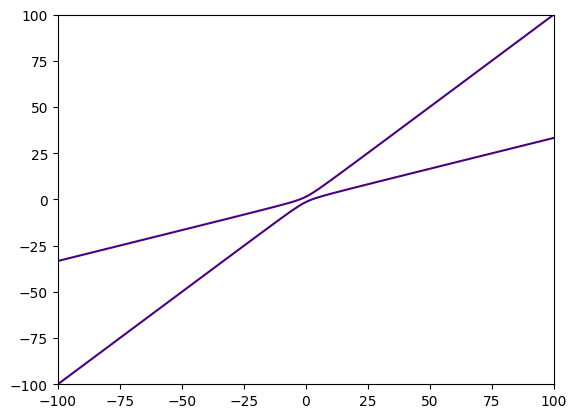

In [12]:
import matplotlib.pyplot as plt

y=np.linspace(-100,100,100)
x=np.linspace(-100,100,100)

f=lambda x: (2*x+np.sqrt(x**2+18))/3
g=lambda x: (2*x-np.sqrt(x**2+18))/3

plt.plot(x,f(x), color='indigo')
plt.plot(x,g(x), color='indigo')
plt.xlim(-100,100)
plt.ylim(-100,100)

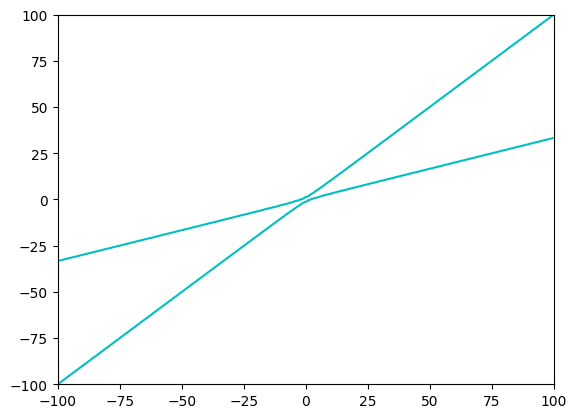

In [13]:
#@title Otra forma de graficar esta cónica
x,y=np.meshgrid(x,y)
plt.contour(x,y, (x**2-4*x*y+3*y**2-6), [0], colors='c')
plt.show()

- Diagonalice A, para ello construya la matrix Q de autovectores ortoganales 
tal que $D=Q^{T}AQ$, en este caso se dice que A es diagonalizable ortogonalmente, donde $A=QDQ^T$.

In [39]:
A = np.array([[1, -2], [-2, 3]])

eigvals, eigvecs = np.linalg.eigh(A)

Q = eigvecs # matriz Q de autovectores ortogonales

D = np.diag(eigvals)

# Verificar que A = Q*D*Q^T
A_diag = np.dot(np.dot(Q, D), Q.T) #np.dot sirve para calcular el producto de matrices
print("Matriz diagonalizada A:")
print(A_diag)


Matriz diagonalizada A:
[[ 1. -2.]
 [-2.  3.]]


- Aplique el resultado de la siguiente demostración para encontrar una nueva hyperbola en una  nueva base

\begin{equation}
QDQ^T \vec{v} \cdot \vec{v} = d
\end{equation}


\begin{equation}
Q(DQ^T\vec{v}) \cdot \vec{v} = (DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


\begin{equation}
(DQ^T\vec{v}) \cdot (Q^T\vec{v})=d
\end{equation}


Sea $u=Q^T\vec{v}$

Luego :


\begin{equation}
(D\vec{u}) \cdot \vec{u}=d
\end{equation}

donde $\vec{u}=(x', y')$, tal que $D\vec{u} \cdot \vec{u}=d$ es una nueva hyperbola 


In [51]:
d=1 #cte hiperbola

x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = np.array([X.ravel(), Y.ravel()]).T

In [43]:
u=Q.T@Z.T

In [46]:
F = D @ u * u
G = np.sum(F, axis=0) - d


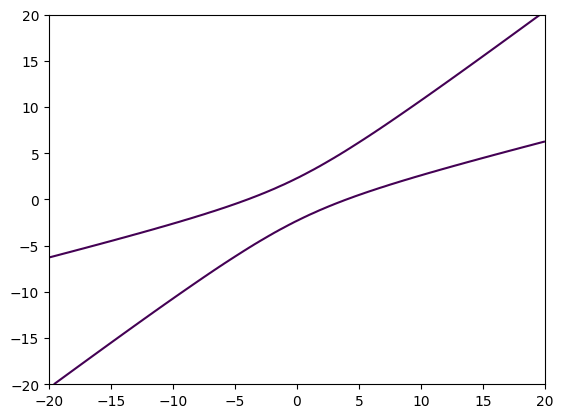

In [53]:
plt.contour(X, Y, G.reshape(X.shape), levels=[0])
plt.show()
